In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5032642199805102471]

In [2]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [2]:
import keras

In [3]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

# 1. 라이브러리 선언

In [4]:
import os
### GPU DISABLE
#os.environ["CUDA_VISIBLE_DEVICES"]=""
### GPU 1번 사용
os.environ["CUDA_VISIBLE_DEVICES"]="1"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [5]:
import keras

In [6]:
import os
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 데이터 불러오기

In [7]:
import cv2
import os
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 훈련데이터 

In [8]:
import os

In [9]:
TRAIN_DIR = "../images/mnist/trainingSet/"

In [10]:
TRAIN_DIR = '../images/mnist/trainingSet/'
train_folder_list = os.listdir(TRAIN_DIR)
train_folder_list

IMG_SIZE = 28
train_images=[]
train_labels=[]
# 폴더를 하나씩 탐색한다!
for index in range(0, len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    # 이미지를 하나씩 탐색한다!
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except Exception as e:
            print(e)
            pass

OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



### 2. 테스트 데이터 

In [11]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = os.listdir(TEST_DIR)
test_folder_list

test_images=[]
test_labels=[]
for index in range(0, len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

### 3. 데이터셋 확인

In [12]:
from numpy import array
import numpy as np

In [13]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [14]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [15]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'label : 9')

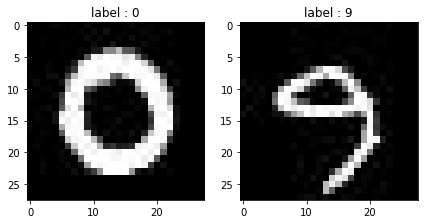

In [19]:
# 훈련/데이터 데이터 시각화
plt.figure(figsize=[7,5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title("label : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(train_images[41999], cmap='gray')
plt.title("label : {}".format(train_labels[41999]))

### 3-1. 이미지(28*28) 매트릭스 변환 (w,h,d)

In [17]:
train_images.shape

(42000, 28, 28)

In [18]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [19]:
train_images.shape

(42000, 28, 28)

In [20]:
train_data.shape

(42000, 28, 28)

In [21]:
train_images[0][1]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0, 12,  0, 16,  0,  0,  4,  0,
        2,  8,  3,  0,  4,  8,  0,  0,  0,  0,  0], dtype=uint8)

### 3-2. float 타입변환 및 정규화

In [22]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

### 3-3. 답지 분류형으로 변환

In [23]:
from keras.utils import to_categorical

In [24]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)

In [25]:
np.argmax(train_labels_one_hot[41999])

9

In [26]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
test_labels_one_hot.shape

(200, 10)

In [28]:
from numpy import argmax

In [29]:
argmax(train_labels_one_hot[10000])

2

In [30]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. 케라스 모델 정의

In [32]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

In [33]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

In [34]:
# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dense(8, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [37]:
# # 모델 시각화
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', 
#            show_shapes=True, 
#            show_layer_names=True)
# from IPython.display import Image
# Image(retina=True, filename='model_plot.png')

# 5. 케라스모델 훈련방법 설정

In [35]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련

In [39]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [40]:
import timeit
start = timeit.default_timer()

# 실행 코드

stop = timeit.default_timer()
print("총 소요시간: ", stop - start)

총 소요시간:  1.4808999999615935e-05


In [41]:
import os

In [42]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [43]:
from datetime import datetime
now = datetime.now()
date = now.strftime("%Y-%m-%d_%H%M")
save_dir = "./logs_{}".format(date)

callbacks = [
    
    keras.callbacks.TensorBoard(
#     log_dir = save_dir,
    write_graph=True,
    write_images=True)
    ,  
    keras.callbacks.EarlyStopping(
    monitor = 'acc', patience=10,
    )
]

# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(train_data, train_labels_one_hot, 
                    batch_size=32,
                    epochs=5,
                    shuffle=True,
                    callbacks = callbacks)




Epoch 1/5
42000/42000 [==============================] - 2s 47us/step - loss: 0.4487 - accuracy: 0.8584

Epoch 2/5
 3872/42000 [=>............................] - ETA: 1s - loss: 0.1965 - accuracy: 0.9452

C:\Users\kopo\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 2s 38us/step - loss: 0.1882 - accuracy: 0.9438
Epoch 3/5
42000/42000 [==============================] - 2s 38us/step - loss: 0.1448 - accuracy: 0.9561
Epoch 4/5
42000/42000 [==============================] - 2s 37us/step - loss: 0.1272 - accuracy: 0.9617
Epoch 5/5
42000/42000 [==============================] - 2s 38us/step - loss: 0.1107 - accuracy: 0.9664


In [44]:
# 모델 저장
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("classlogic.h5")

In [45]:
# 모델 불러오기
from keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("classlogic.h5") 

In [46]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
loaded_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [47]:
# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = loaded_model.fit(train_data, train_labels_one_hot, 
                    batch_size=42000,
                    epochs=5,
                    shuffle=True,
                    callbacks = callbacks)

Epoch 1/5
42000/42000 [==============================] - 2s 46us/step - loss: 0.0869 - accuracy: 0.9734
Epoch 2/5


C:\Users\kopo\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 2s 41us/step - loss: 0.0725 - accuracy: 0.9783
Epoch 3/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.0695 - accuracy: 0.9794
Epoch 4/5
42000/42000 [==============================] - 1s 25us/step - loss: 0.0686 - accuracy: 0.9799
Epoch 5/5
42000/42000 [==============================] - 1s 24us/step - loss: 0.0670 - accuracy: 0.9804


In [48]:
import pandas as pd

In [49]:
pd.DataFrame(history.history).tail(10)

,loss,accuracy
0,0.086886,0.973357
1,0.072540,0.978333
2,0.069483,0.979357
3,0.068621,0.979881
4,0.066969,0.980405


# 7. 모델 추론

In [50]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(test_data, 
                                     test_labels_one_hot)
print(test_loss, test_acc)


200/200 [==============================] - 0s 589us/step
0.14396438017487526 0.9599999785423279


# 8. 훈련내용 확인하기 (Tensorboard)

# 9. 예측 및 비교

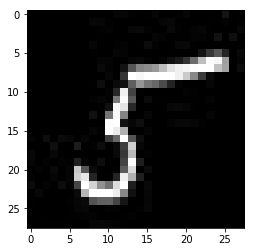

In [51]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [52]:
test_data2 = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE)
test_data2 = test_data2.astype('float')
test_data2 /= 255

In [53]:
# Predict the most likely class
label_pred = model.predict(test_data2[[0],:])

In [54]:
label_pred

array([[4.3094593e-07, 1.0801389e-08, 1.1723343e-08, 7.8702906e-05,
        4.5409430e-11, 9.9991858e-01, 1.3129497e-06, 3.7880895e-08,
        8.2148586e-07, 1.6030613e-07]], dtype=float32)

In [55]:
np.argmax(label_pred)

5

# XAI

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


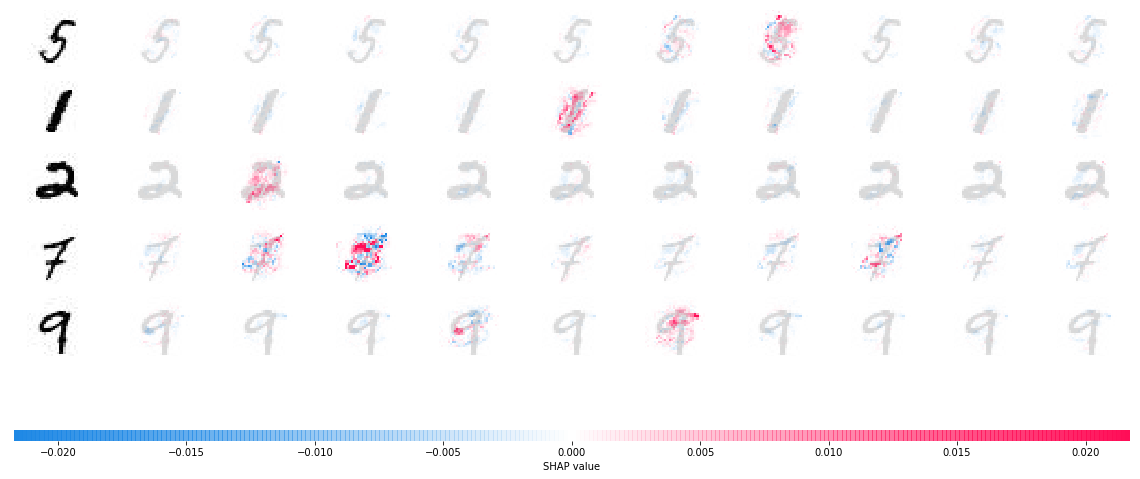

In [56]:
import shap
import numpy as np

# 설명할 백데이터 샘플을 생성함 (100 개 무작위 선택 )
background = train_data[np.random.choice(train_data.shape[0], 
                                         100, 
                                         replace=False)]
                       
# 백그라운드 이미지들에대해서 설명값 생성
e = shap.DeepExplainer(model, background) 

shap_values=e.shap_values(background[0:5])

train_data.shape

testchoice = test_data[np.random.choice(test_data.shape[0], 
                                         5, 
                                         replace=False)]

shap.image_plot(shap_values, -testchoice[0:5])

### 다른모델 생성 (과적합 회피)

In [57]:
from keras.layers import Dropout

# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


### gpu 메모리 해제

In [58]:
# from keras import backend as K

# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()

CudaSupportError: Error at driver init: 
[100] Call to cuInit results in CUDA_ERROR_NO_DEVICE: